In [1]:
import numpy as np
import scipy.io as sio
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [ ]:
"""
Dataset corresponding to subject 0 from Ninapro Database 2- Exercise 1 and UCD-MyoVerse-Hand-0 are
preprossed and given as .npy files. 

1) 

a. Multivariate timeseries data corresponding to Ninapro was a matrix X of dimension 
(102, 12, 10000) - (trials, channels, timepoints).

b. We normalize the matrix along the last dimension as,

Mean = np.mean(X, axis = -1)
std = np.std(X, axis = -1)

X = (X - Mean[..., np.newaxis])/std[..., np.newaxis]

c. Then we obtain the covariance matrix as

P = np.zeros((102, 12, 12))
for trial in range(numberTests):
    P[trial] = (1/10000) * np.dot(X[trial], np.transpose(X[trial]))

The example numpy file 'ninaproSubject0Data.npy' contains 
P of dimensions (102, 12, 12) - (trials, channels, channels) and corresponding labels.

2)

Similarly, the example numpy file 'UCDMyoVerseSubject0Data.npy' contains 
P of dimensions (360, 12, 12) - (trials, channels, channels) and corresponding labels.
Preprocessing steps are same as described above.
"""

In [3]:
""" 
Split a Cholesky matrix into a diagonal matrix and a strictly lower triangular matrix.
Take logarithm of the diagonal matrix.
"""

def splitMatrix(matrix):
    diagonalMatrix = np.diag(np.log(np.diag(matrix)))
    strictlyLowerTriangularMatrix = np.tril(matrix, k = -1)
    return diagonalMatrix, strictlyLowerTriangularMatrix

In [4]:
"""
Compute the Riemannian geodesic distance between 2 Cholesky matrices. matrix1 and matrix2
are SPD matrices of dimensions (channels, channels).
"""

def distanceMatrices(matrix1, matrix2):
    chol1 = np.linalg.cholesky(matrix1)
    chol2 = np.linalg.cholesky(matrix2)
    chol1D, chol1L = splitMatrix(chol1)
    chol2D, chol2L = splitMatrix(chol2)
    distanceL = np.square(np.linalg.norm(chol1L - chol2L, 'fro'))
    distanceD = np.square(np.linalg.norm(chol1D - chol2D, 'fro'))
    distance = np.sqrt(distanceL + distanceD)
    return distance

In [5]:
"""
Compute pairwise Riemannian geodesic distances between trials of a matrix of
dimensions (trials, channels, channels)
"""

def pairwiseDistances(matrix):
    numberMatrices, n, _ = np.shape(matrix)
    DISTANCES = np.zeros((numberMatrices, numberMatrices))
    for i in range(numberMatrices):
        for j in range(i, numberMatrices):
            distance = distanceMatrices(matrix[i], matrix[j])
            DISTANCES[i, j] = distance
            DISTANCES[j, i] = distance
    return DISTANCES

In [6]:
""" Visualize tSNE plots"""

def tSNE(covarianceMatrix, Perplexity):
    temporaryMatrix = covarianceMatrix.reshape(-1, 12, 12)
    
    pairwiseDistance = pairwiseDistances(temporaryMatrix)
    
    tsne = TSNE(metric = 'precomputed', perplexity = Perplexity, learning_rate = 200, early_exaggeration = 4, init = "random", n_jobs = -1)

    out = tsne.fit_transform(pairwiseDistance)


    return out

(360, 12, 12)
(360,)


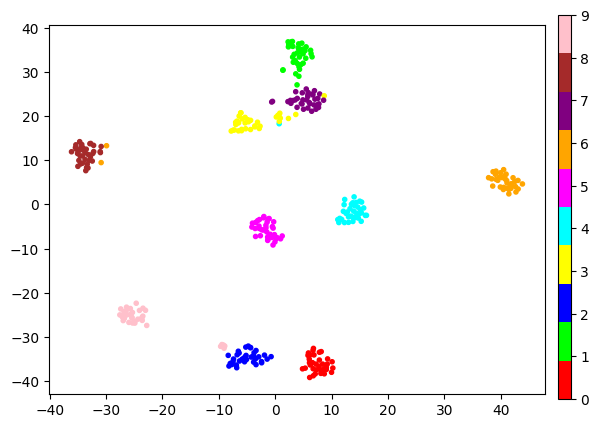

In [7]:
"""
Load data of Subject 0 from UCD-MyoVerse-Hand-0 and visualize its embedding
"""

covarianceMatrices = np.load("UCDMyoVerseSubject0Data.npy")
Labels = np.load("UCDMyoVerseSubject0Labels.npy")
print(covarianceMatrices.shape)
print(Labels.shape)

tsneEmbedding = tSNE(covarianceMatrices, 20)

colors = colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FFA500', '#800080', '#A52A2A', '#FFC0CB']

colors = ListedColormap(colors)

plt.scatter(tsneEmbedding[:, 0], tsneEmbedding[:, 1], c = Labels, cmap = colors, marker='.')

colorbar_ax = plt.gcf().add_axes([0.92, 0.1, 0.02, 0.8])
                                
cbar = plt.colorbar(orientation='vertical', cax=colorbar_ax)
cbar.set_ticks(range(10))  
cbar.set_ticklabels(range(10)) 
plt.show()

(102, 12, 12)
(102,)


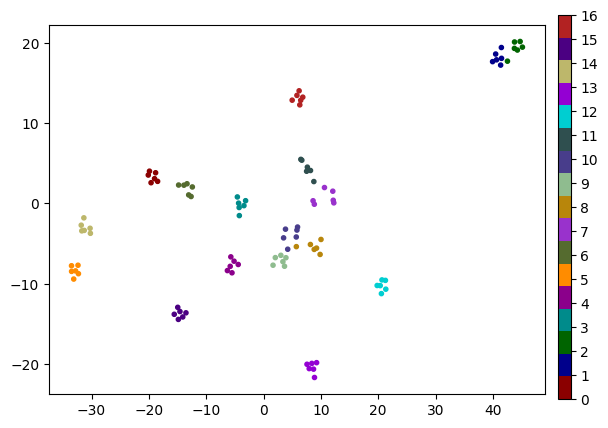

In [28]:
"""
Load data of Subject 0 from Ninapro database and visualize its embedding
"""

covarianceMatrices = np.load("ninaproSubject0Data.npy")
Labels = np.load("ninaproSubject0Labels.npy")
print(covarianceMatrices.shape)
print(Labels.shape)

tsneEmbedding = tSNE(covarianceMatrices, 8)

colors = [

"darkred",
"darkblue",
"darkgreen",
"darkcyan",
"darkmagenta",
"darkorange",
"darkolivegreen",
"darkorchid",
"darkgoldenrod",
"darkseagreen",
"darkslateblue",
"darkslategray",
"darkturquoise",
"darkviolet",
"darkkhaki",
"indigo",
"firebrick",]

colors = ListedColormap(colors)

plt.scatter(tsneEmbedding[:, 0], tsneEmbedding[:, 1], c = Labels - 1, cmap = colors, marker='.')

colorbar_ax = plt.gcf().add_axes([0.92, 0.1, 0.02, 0.8])
                                 
cbar = plt.colorbar(orientation='vertical', cax=colorbar_ax)
cbar.set_ticks(range(17))  
cbar.set_ticklabels(range(17)) 
plt.show()
plt.close()

